In [65]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# Importing csv file and take out information from dataset
df = pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
# Exploring data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
# Finding correlations
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [127]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- From above we conclude that age has some missing values
- There are some outliers in Fare as it very differently in Std, 75% and max
- Our most important features are Sex, Age, Pclass, Parch

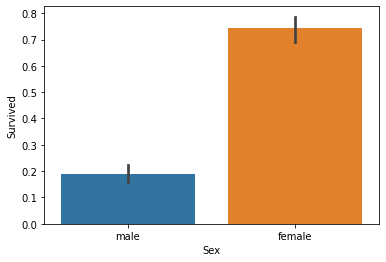

In [154]:
# Creating barplot for visulization
sns.barplot(df['Sex'],df['Survived'],data=df);

In [155]:
tar_var = df['Survived']
tar_var

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [156]:
ind_var = df.drop(['Ticket','Fare','Cabin','Embarked','Name','PassengerId','Survived','SibSp'], axis = 'columns')
ind_var

,Pclass,Sex,Age,Parch
0,3,male,22.000000,0
1,1,female,38.000000,0
2,3,female,26.000000,0
3,1,female,35.000000,0
4,3,male,35.000000,0
...,...,...,...,...
886,2,male,27.000000,0
887,1,female,19.000000,0
888,3,female,29.699118,2
889,1,male,26.000000,0


In [157]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [158]:
ind_var['Age'] = df['Age']
ind_var.head()

,Pclass,Sex,Age,Parch
0,3,male,22.0,0
1,1,female,38.0,0
2,3,female,26.0,0
3,1,female,35.0,0
4,3,male,35.0,0


In [159]:
from sklearn.preprocessing import LabelEncoder
label_sex = LabelEncoder()
ind_var['Sex'] = label_sex.fit_transform(ind_var['Sex'])

In [160]:
ind_var.head()

,Pclass,Sex,Age,Parch
0,3,1,22.0,0
1,1,0,38.0,0
2,3,0,26.0,0
3,1,0,35.0,0
4,3,1,35.0,0


In [161]:
tar_var.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

***here in ind_var for sex 0 is female and 1 is for male***


In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(ind_var,tar_var,test_size=0.25,random_state=45)

In [163]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [164]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [165]:
model.score(X_test,y_test)

0.8565022421524664

In [167]:
model.predict([[2,0,4,1]])

array([1], dtype=int64)

***Here 1 Means survived and 0 means not survived***